# Predicting customer credit rating using Logistic Regression

This German bank data set contains entries for 235 customers in which Bank have some information of their customers and the credit ratings of those customers.

The response variable in this data set has two outcomes – 1 and 0. 1 indicates credit rating is good and 0 indicates credit rating is not good.

We need to build a model based on those parameters to predict which customers will have high credit rating and which will have low credit rating.
If this prediction can be made accurately, Banks would be able to easily segment the customers whom they should provide credits ( Loans and credit cards).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [2]:
df=pd.read_csv('bank.csv')
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIO_TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
CO_APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 1000 non-null int64
OTHER_INSTALL 

(1000, 31)

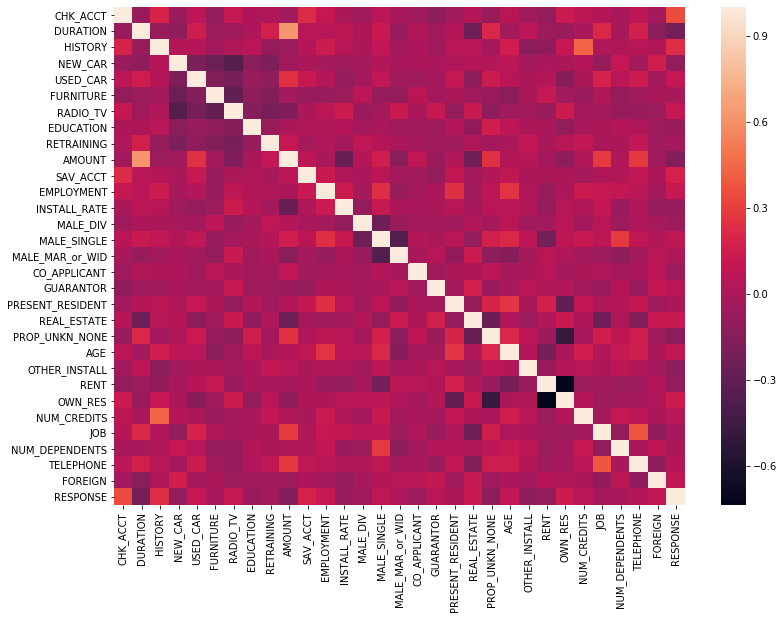

In [3]:
# Correlation of variables described using heatmap
a4_dims=(11.7,8.7)
fig,ax=plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(),ax=ax)
plt.tight_layout()

In [4]:
# Convert specific columns into category
L=[0]
a=list(range(2,9))
b=list(range(10,21))
c=list(range(22,31))
L.extend(a)
L.extend(b)
L.extend(c)
col=list(df.columns)
for i in L:
    df[col[i]]=df[col[i]].astype('category')

RESPONSE
0    33.963333
1    36.224286
Name: AGE, dtype: float64

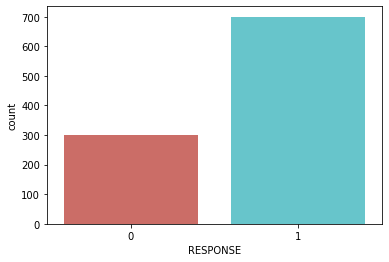

In [5]:
# Descriptive Analytics
sns.countplot(x='RESPONSE',data=df,palette='hls')
df.groupby('RESPONSE').mean()
df.groupby('RESPONSE')['AGE'].mean()

In [6]:
# Split Train and Test

X=df.iloc[:,df.columns!='RESPONSE']
y=df['RESPONSE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [7]:
#Solver Available:{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}

# Lasso v/s Ridge Regression
#Lasso: minimizes the total absolute value of error[Good for large no. of features]
#Ridge: minimize total squared error

#Create Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight = "balanced", penalty='l2' )
# "balanced" mode uses the values of y 
#to automatically adjust weights inversely proportional to class frequencies 

model.fit(X_train,y_train)


C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Predict test data set
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [9]:
# Model Metrics and Performance
from sklearn.metrics import roc_auc_score
print("AUC score is ",roc_auc_score(y_test,y_pred_prob[:,1]))
print(f'Accuracy of logistic regression classifier on test set: {model.score(X_test, y_test)}')
##Returns the mean accuracy on the given test data and labels.


AUC score is  0.7890371438874865
Accuracy of logistic regression classifier on test set: 0.71


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


0.8608695652173913

In [11]:
(TP+TN)/ (TN+TP+FP+FN)# Accuracy

0.71

In [12]:
TP/(TP+FN)# Sensitivity

0.7021276595744681

In [13]:
TN/(TN+FP)# Specificity

0.7288135593220338

In [14]:
FP/(TN+FP)# FPR

0.2711864406779661

In [15]:
TP/(TP+FP)# Precision

0.8608695652173913

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60        59
           1       0.86      0.70      0.77       141

    accuracy                           0.71       200
   macro avg       0.68      0.72      0.69       200
weighted avg       0.76      0.71      0.72       200



In [17]:
# Receiver Operating Characteristic (ROC) curve: For Train Data
y_pred_prob_train=model.predict_proba(X_train)[:,1]
logreg_roc_auc = roc_auc_score(y_train, y_pred_prob_train)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred_prob_train) # fpr=false positive value, tpr=true positive value
len(fpr)
len(tpr)
len(thresholds)
thresholds[thresholds>0.85][-1]

0.9018766691574838

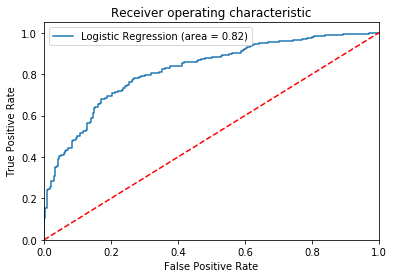

In [18]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=0)
plt.show()

In [19]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])# Threshold
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

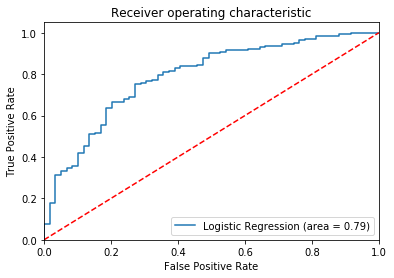

In [20]:
# Receiver Operating Characteristic (ROC) curve: For test data
logreg_roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1]) # fpr=false positive value, tpr=true positive value
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
plt.show()


In [21]:
#Recursive Feature Elimination (RFE)

model2 = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(model2, 20) # selecting best 20 features
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

L=list(df.columns)
rank=list(rfe.ranking_)
feature=[]
for i in range(len(rfe.support_)):
    if rank[i]==1:
        feature.append(L[i])
print(feature)

[ True False  True  True  True  True  True  True False False  True False
 False  True  True False False  True False  True  True False  True  True
  True  True  True False  True  True]
[ 1  6  1  1  1  1  1  1 10 11  1  3  2  1  1  7  4  1  9  1  1  8  1  1
  1  1  1  5  1  1]
['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO_TV', 'EDUCATION', 'SAV_ACCT', 'MALE_DIV', 'MALE_SINGLE', 'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'TELEPHONE', 'FOREIGN']


C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [22]:
# Data for train and test considering best 20 features
x_train_new=pd.DataFrame()
for i in feature:
    x_train_new[i]=X_train[i]
x_test_new=pd.DataFrame()
for i in feature:
    x_test_new[i]=X_test[i]

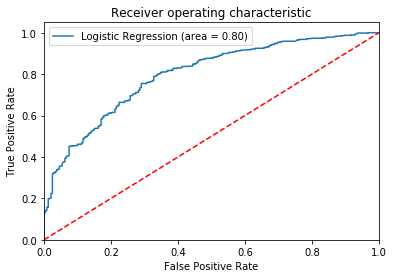

In [23]:
# Receiver Operating Characteristic (ROC) curve: For new Train Data considering 20 features
rfe = rfe.fit(x_train_new, y_train)
predict_proba_train=rfe.predict_proba(x_train_new)[:,1]
rfe_roc_auc = roc_auc_score(y_train, predict_proba_train)
fpr, tpr, thresholds = roc_curve(y_train,rfe.predict_proba(x_train_new)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=2)

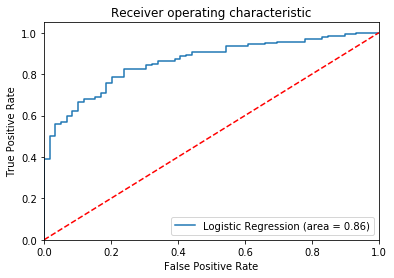

In [24]:
# Receiver Operating Characteristic (ROC) curve : For new test Data considering 20 features
rfe = rfe.fit(x_test_new, y_test)
predict_proba_test=rfe.predict_proba(x_test_new)[:,1]
rfe_roc_auc = roc_auc_score(y_test, predict_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,rfe.predict_proba(x_test_new)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)